In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Furniture.csv")
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [3]:
df.shape

(2500, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [5]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [6]:
df.dtypes

price                  float64
cost                   float64
sales                    int64
profit_margin          float64
inventory                int64
discount_percentage    float64
delivery_days            int64
category                object
material                object
color                   object
location                object
season                  object
store_type              object
brand                   object
revenue                float64
dtype: object

In [7]:
df.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


In [8]:
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


In [9]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [10]:
df.shape

(2500, 15)

In [11]:
le=LabelEncoder()
df_col=('category', 'material', 'color','location', 'season', 'store_type', 'brand')
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [12]:
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,0,3,4,0,1,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,1,1,1,0,2,0,3,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,4,2,0,1,0,0,3,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,4,1,3,0,2,1,3,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,1,1,2,0,0,0,3,-4588.255733


<Axes: >

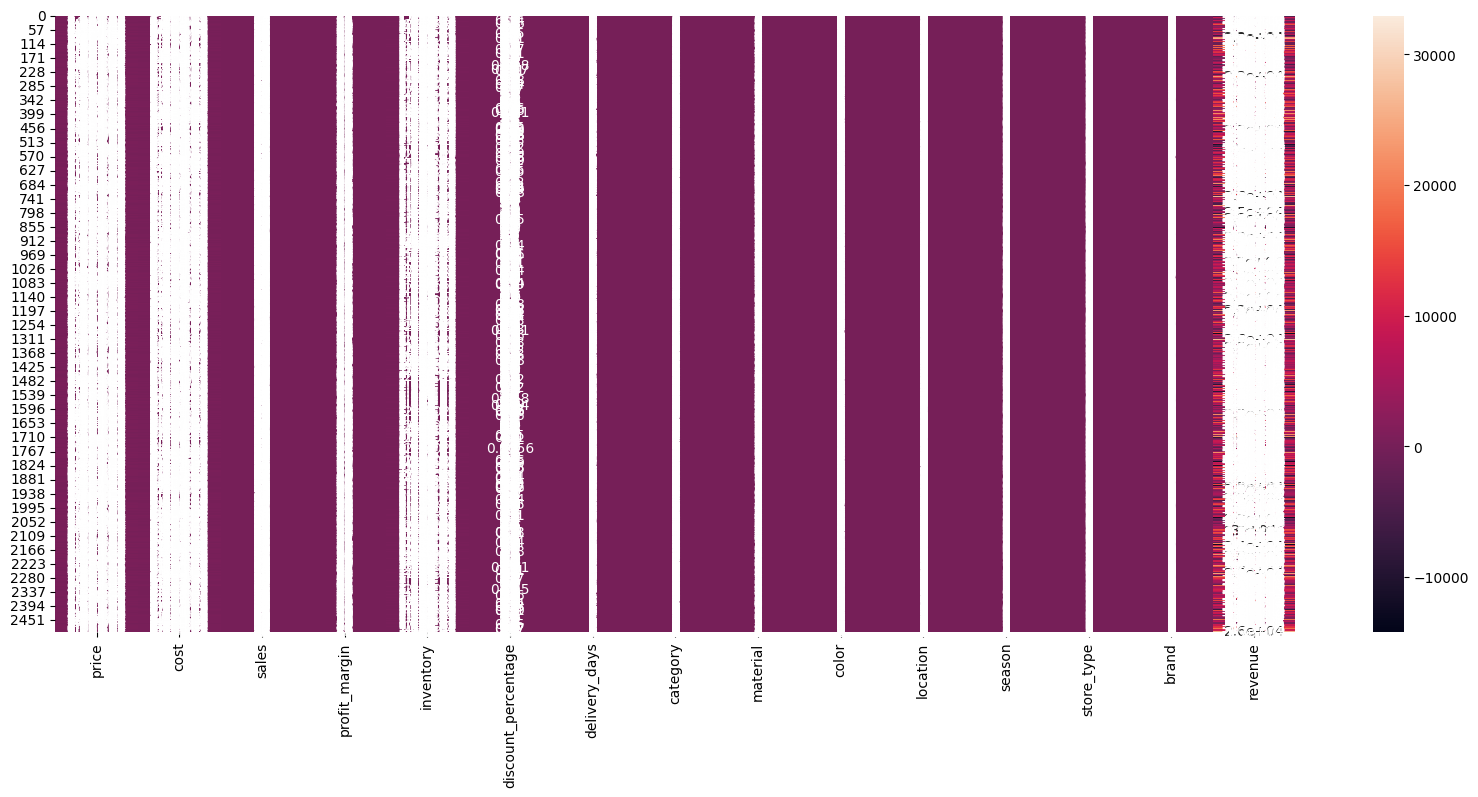

In [13]:
plt.figure(figsize=(20,8))
sns.heatmap(df,annot=True)

In [14]:
'''
for i in ['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.price,y=df[i],data=df,linewidth=1,)
    plt.show()
'''

"\nfor i in ['price', 'cost', 'sales', 'profit_margin', 'inventory',\n       'discount_percentage', 'delivery_days', 'category', 'material', 'color',\n       'location', 'season', 'store_type', 'brand', 'revenue']:\n    plt.figure(figsize=(15,9))\n    sns.boxplot(x=df.price,y=df[i],data=df,linewidth=1,)\n    plt.show()\n"

In [15]:
df=df.drop(['inventory'],axis=True)

In [16]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'discount_percentage',
       'delivery_days', 'category', 'material', 'color', 'location', 'season',
       'store_type', 'brand', 'revenue'],
      dtype='object')

<Axes: xlabel='price', ylabel='revenue'>

C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Md Asif Ikbal\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


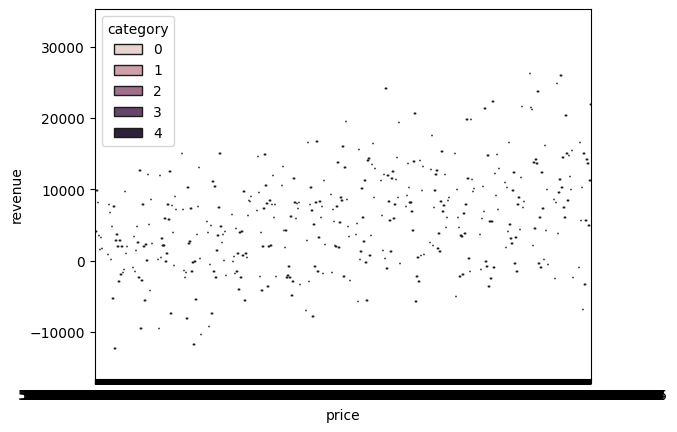

In [17]:
sns.boxplot(data=df, x="price", y="revenue", hue="category")

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame
df = df
# Calculate the Z-scores for each column
z_scores = np.abs(stats.zscore(df))

# Define a threshold to consider data as an outlier
threshold = 3  # Z-score greater than 3 is considered an outlier

# Identify rows that are not outliers
df_clean = df[(z_scores < threshold).all(axis=1)]

# Print the original data, outliers, and the clean data
print("Original Data:")
print(df)
print("\nClean Data (Outliers removed):")
print(df_clean)

# Optionally, you can store the clean data in a new variable
clean_data = df_clean


Original Data:
           price        cost  sales  profit_margin  discount_percentage  \
0     218.543053  181.610932     40      16.899243            27.796433   
1     477.821438  385.033827      7      19.418888            26.943715   
2     379.397274  276.736765     32      27.058842            21.948130   
3     319.396318  281.841334     48      11.758114            11.009944   
4     120.208388   69.743681     19      41.981019             3.183763   
...          ...         ...    ...            ...                  ...   
2495  271.546466  233.247261      8      14.104107             9.789608   
2496  309.775563  169.680310     24      45.224760            21.835025   
2497  439.509716  277.390903     48      36.886286             2.817299   
2498  491.332705  405.987306     38      17.370185            19.781256   
2499  233.412894  172.474611      6      26.107505             9.502415   

      delivery_days  category  material  color  location  season  store_type  \
0   

In [19]:
clean_data.head()

,price,cost,sales,profit_margin,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,27.796433,9,0,3,4,0,1,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,26.943715,6,1,1,1,0,2,0,3,-3521.002258
2,379.397274,276.736765,32,27.058842,21.948130,2,4,2,0,1,0,0,3,14285.560219
3,319.396318,281.841334,48,11.758114,11.009944,2,4,1,3,0,2,1,3,12261.073703
4,120.208388,69.743681,19,41.981019,3.183763,9,1,1,2,0,0,0,3,-4588.255733


In [20]:
clean_data.shape

(2497, 14)

In [21]:
import pandas as pd

# Sample dataset (replace this with your actual dataset)
df=df

# Function to find outliers using IQR
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = ((df < lower_bound) | (df > upper_bound))
    return outliers

# Find outliers in the dataset
outliers = find_outliers_IQR(df)

# Remove outliers and create a new variable for the clean data
clean_data = df[~outliers.any(axis=1)]

# Display the outliers and clean data
print("Outliers:\n", df[outliers.any(axis=1)])
print("\nClean Data:\n", clean_data)


Outliers:
            price        cost  sales  profit_margin  discount_percentage  \
91    370.960154  304.774706     44      17.841660             7.207878   
238   340.462533  301.345887      1      11.489266             8.353959   
554   444.494121  339.016744     42      23.729757             2.103541   
732   349.338749  208.953803     43      40.185907            24.303763   
796   469.453227  356.468606     49      24.067280             4.847939   
998   477.606809  276.372641     41      42.133857             7.247550   
1083  445.603238  376.052536     48      15.608213            20.054659   
1139  316.583503  184.573366     46      41.698363            16.824370   
1197  485.995035  372.829712     42      23.285284            17.898916   
1298  336.393612  191.411178      5      43.099045             1.849257   
1312  296.416569  175.066190     39      40.939135             8.538308   
1342  440.722627  304.203715     43      30.976152            27.976294   
1903   65.8901

In [22]:
clean_data.head()

,price,cost,sales,profit_margin,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,27.796433,9,0,3,4,0,1,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,26.943715,6,1,1,1,0,2,0,3,-3521.002258
2,379.397274,276.736765,32,27.058842,21.948130,2,4,2,0,1,0,0,3,14285.560219
3,319.396318,281.841334,48,11.758114,11.009944,2,4,1,3,0,2,1,3,12261.073703
4,120.208388,69.743681,19,41.981019,3.183763,9,1,1,2,0,0,0,3,-4588.255733


In [23]:
clean_data.shape

(2478, 14)

In [24]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a DataFrame
df = clean_data
# Calculate the Z-scores for each column
z_scores = np.abs(stats.zscore(df))

# Define a threshold to consider data as an outlier
threshold = 3  # Z-score greater than 3 is considered an outlier

# Identify rows that are not outliers
df_clean = df[(z_scores < threshold).all(axis=1)]

# Print the original data, outliers, and the clean data
print("Original Data:")
print(df)
print("\nClean Data (Outliers removed):")
print(df_clean)

# Optionally, you can store the clean data in a new variable
clean_data_1 = df_clean
clean_data_1.shape

Original Data:
           price        cost  sales  profit_margin  discount_percentage  \
0     218.543053  181.610932     40      16.899243            27.796433   
1     477.821438  385.033827      7      19.418888            26.943715   
2     379.397274  276.736765     32      27.058842            21.948130   
3     319.396318  281.841334     48      11.758114            11.009944   
4     120.208388   69.743681     19      41.981019             3.183763   
...          ...         ...    ...            ...                  ...   
2494  280.073958  147.704363     26      47.262372            24.983251   
2495  271.546466  233.247261      8      14.104107             9.789608   
2496  309.775563  169.680310     24      45.224760            21.835025   
2498  491.332705  405.987306     38      17.370185            19.781256   
2499  233.412894  172.474611      6      26.107505             9.502415   

      delivery_days  category  material  color  location  season  store_type  \
0   

(2478, 14)

In [25]:
import pandas as pd

# Sample dataset (replace this with your actual dataset)
df=clean_data_1

# Function to find outliers using IQR
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = ((df < lower_bound) | (df > upper_bound))
    return outliers

# Find outliers in the dataset
outliers = find_outliers_IQR(df)

# Remove outliers and create a new variable for the clean data
clean_data_2 = df[~outliers.any(axis=1)]

# Display the outliers and clean data
print("Outliers:\n", df[outliers.any(axis=1)])
print("\nClean Data:\n", clean_data_2)

clean_data_2.head()

Outliers:
            price        cost  sales  profit_margin  discount_percentage  \
248   483.628990  398.727683     45      17.555049            22.286964   
1200  391.218438  291.295555     48      25.541456             1.579263   
1288   64.941399   35.554353     43      45.251636            18.468359   
2153  421.690196  354.067622     46      16.036079             9.911428   
2417   67.548206   43.827498     39      35.116710            14.661938   

      delivery_days  category  material  color  location  season  store_type  \
248               4         1         0      2         2       0           0   
1200              7         4         0      2         2       2           1   
1288              1         2         4      2         1       0           1   
2153              8         1         2      4         0       1           0   
2417              3         0         2      2         2       1           0   

      brand       revenue  
248       2  23676.465420  
1

,price,cost,sales,profit_margin,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,27.796433,9,0,3,4,0,1,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,26.943715,6,1,1,1,0,2,0,3,-3521.002258
2,379.397274,276.736765,32,27.058842,21.948130,2,4,2,0,1,0,0,3,14285.560219
3,319.396318,281.841334,48,11.758114,11.009944,2,4,1,3,0,2,1,3,12261.073703
4,120.208388,69.743681,19,41.981019,3.183763,9,1,1,2,0,0,0,3,-4588.255733


In [26]:
df=clean_data_2

In [27]:
df.head()

,price,cost,sales,profit_margin,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,27.796433,9,0,3,4,0,1,0,0,3949.165238
1,477.821438,385.033827,7,19.418888,26.943715,6,1,1,1,0,2,0,3,-3521.002258
2,379.397274,276.736765,32,27.058842,21.948130,2,4,2,0,1,0,0,3,14285.560219
3,319.396318,281.841334,48,11.758114,11.009944,2,4,1,3,0,2,1,3,12261.073703
4,120.208388,69.743681,19,41.981019,3.183763,9,1,1,2,0,0,0,3,-4588.255733


In [28]:
import pandas as pd
df = df
df = df.round(2)

In [29]:
df.head()

,price,cost,sales,profit_margin,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.54,181.61,40,16.90,27.80,9,0,3,4,0,1,0,0,3949.17
1,477.82,385.03,7,19.42,26.94,6,1,1,1,0,2,0,3,-3521.00
2,379.40,276.74,32,27.06,21.95,2,4,2,0,1,0,0,3,14285.56
3,319.40,281.84,48,11.76,11.01,2,4,1,3,0,2,1,3,12261.07
4,120.21,69.74,19,41.98,3.18,9,1,1,2,0,0,0,3,-4588.26


In [30]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'discount_percentage',
       'delivery_days', 'category', 'material', 'color', 'location', 'season',
       'store_type', 'brand', 'revenue'],
      dtype='object')

In [31]:
df=df.drop(['profit_margin','store_type', 'brand','color', 'location', 'season','delivery_days'],axis=True)
df.head()

,price,cost,sales,discount_percentage,category,material,revenue
0,218.54,181.61,40,27.80,0,3,3949.17
1,477.82,385.03,7,26.94,1,1,-3521.00
2,379.40,276.74,32,21.95,4,2,14285.56
3,319.40,281.84,48,11.01,4,1,12261.07
4,120.21,69.74,19,3.18,1,1,-4588.26


In [32]:

object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [33]:
object_col

[]

In [34]:
num_col

['price',
 'cost',
 'sales',
 'discount_percentage',
 'category',
 'material',
 'revenue']

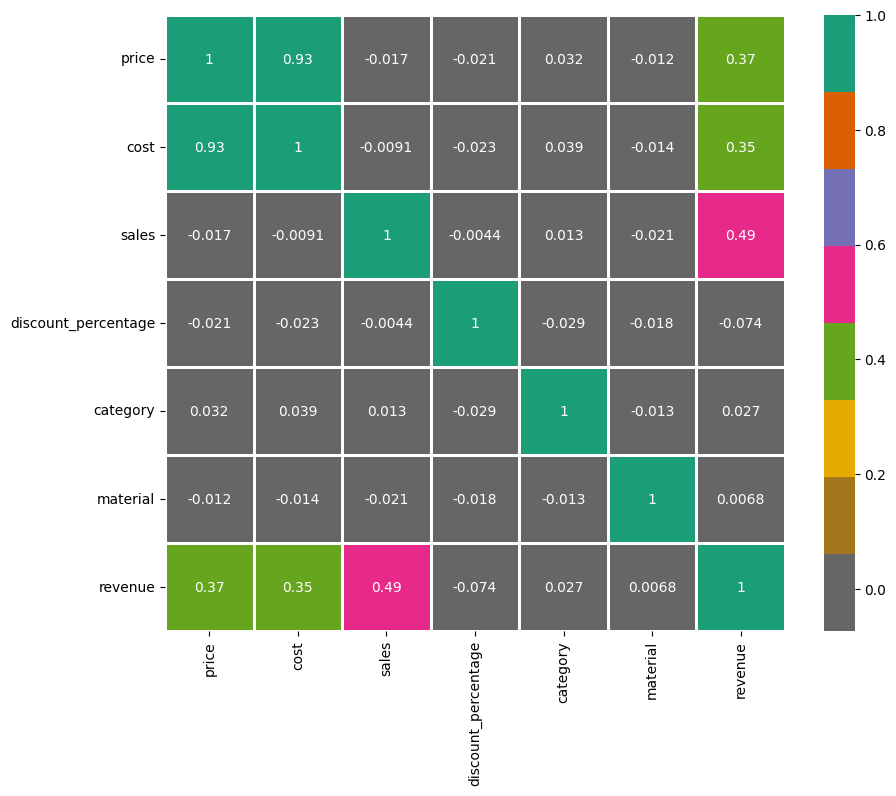

In [35]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [36]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
discount_percentage    0
category               0
material               0
revenue                0
dtype: int64

In [37]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "price" is
 price
486.46    3
88.41     2
464.38    2
133.96    2
350.40    2
         ..
403.33    1
139.85    1
281.41    1
316.59    1
474.82    1
Name: count, Length: 2414, dtype: int64
-------------------------------------------------
unique values in column "cost" is
 cost
197.47    3
239.91    3
54.37     3
133.20    3
160.58    3
         ..
142.87    1
252.79    1
62.45     1
112.46    1
65.35     1
Name: count, Length: 2376, dtype: int64
-------------------------------------------------
unique values in column "sales" is
 sales
39    69
12    63
18    63
42    59
2     58
5     58
23    57
26    57
37    56
29    56
13    56
38    55
24    55
49    54
10    54
21    54
44    54
7     53
28    53
34    52
48    52
33    52
25    51
6     51
11    51
3     50
16    50
17    50
15    50
35    49
31    49
40    49
20    48
9     48
36    48
8     47
27    46
45    45
22    45
19    45
4     45
30    43
46    43
14    43
32    41
43    38
41    37
1     36


In [38]:
import pandas as pd
corr_matrix = df.corr()

threshold = 0.1  
corr_with_revenue = corr_matrix['revenue'].abs()

columns_to_drop = corr_with_revenue[corr_with_revenue < threshold].index

df = df.drop(columns=columns_to_drop)

print("Columns dropped due to low correlation: ", columns_to_drop)
print("Updated DataFrame:\n", df)


Columns dropped due to low correlation:  Index(['discount_percentage', 'category', 'material'], dtype='object')
Updated DataFrame:
        price    cost  sales   revenue
0     218.54  181.61     40   3949.17
1     477.82  385.03      7  -3521.00
2     379.40  276.74     32  14285.56
3     319.40  281.84     48  12261.07
4     120.21   69.74     19  -4588.26
...      ...     ...    ...       ...
2494  280.07  147.70     26   3877.27
2495  271.55  233.25      8  -3351.94
2496  309.78  169.68     24   -445.62
2498  491.33  405.99     38  18963.25
2499  233.41  172.47      6  -1692.34

[2473 rows x 4 columns]


In [39]:
df.head()

,price,cost,sales,revenue
0,218.54,181.61,40,3949.17
1,477.82,385.03,7,-3521.00
2,379.40,276.74,32,14285.56
3,319.40,281.84,48,12261.07
4,120.21,69.74,19,-4588.26


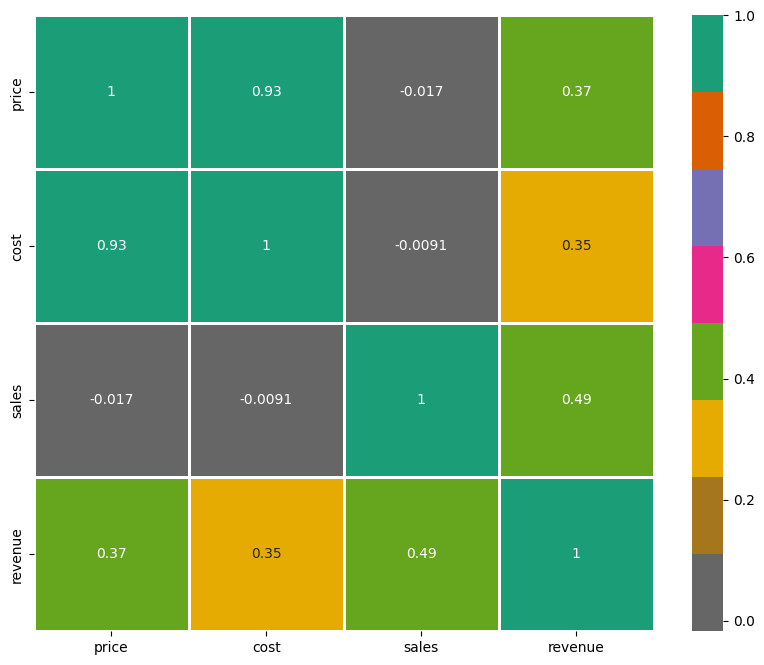

In [40]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [41]:
x=df.drop(['revenue'],axis='columns')
x.head()

,price,cost,sales
0,218.54,181.61,40
1,477.82,385.03,7
2,379.40,276.74,32
3,319.40,281.84,48
4,120.21,69.74,19


In [42]:
y = pd.Series(df.revenue.values)
print(y.head())

0     3949.17
1    -3521.00
2    14285.56
3    12261.07
4    -4588.26
dtype: float64


In [43]:
y

0        3949.17
1       -3521.00
2       14285.56
3       12261.07
4       -4588.26
          ...   
2468     3877.27
2469    -3351.94
2470     -445.62
2471    18963.25
2472    -1692.34
Length: 2473, dtype: float64

In [44]:
x

,price,cost,sales
0,218.54,181.61,40
1,477.82,385.03,7
2,379.40,276.74,32
3,319.40,281.84,48
4,120.21,69.74,19
...,...,...,...
2494,280.07,147.70,26
2495,271.55,233.25,8
2496,309.78,169.68,24
2498,491.33,405.99,38


In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
li=LinearRegression()
li.fit(xtrain,ytrain)
pre_li=li.predict(xtest)
from sklearn.metrics import mean_squared_error, r2_score
mse_li=mean_squared_error(ytest,pre_li)
r2_li=r2_score(ytest,pre_li)
print(f"Mean Squared Error: {mse_li}")
print(f"R-squared: {r2_li}")

Mean Squared Error: 28490614.844104066
R-squared: 0.37237316825348044


In [47]:
# Change to KNeighborsRegressor for continuous target variables
from sklearn.neighbors import KNeighborsRegressor 

kne = KNeighborsRegressor() # Use Regressor instead of Classifier
kne.fit(xtrain,ytrain)
pred_kne = kne.predict(xtest)

# For regression tasks, use appropriate metrics like mean squared error or R-squared
from sklearn.metrics import mean_squared_error, r2_score

mse_kne = mean_squared_error(ytest, pred_kne)
r2_kne = r2_score(ytest, pred_kne)

print(f"Mean Squared Error: {mse_kne}")
print(f"R-squared: {r2_kne}")

Mean Squared Error: 32044585.60224702
R-squared: 0.2940818635814566


In [48]:
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
tre = DecisionTreeRegressor() # Use Regressor for continuous data
tre.fit(xtrain,ytrain)
pre_tre = tre.predict(xtest)
mse_tree = mean_squared_error(ytest,pre_tre)
r2_tree = r2_score(ytest,pre_tre)
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")

Mean Squared Error: 53893109.158835314
R-squared: -0.18722468923231905


In [49]:
from sklearn.ensemble import AdaBoostRegressor 
ada=AdaBoostRegressor() # Use AdaBoostRegressor for continuous target variable
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
mse_ada=mean_squared_error(ytest,pre_ada)
r2_ada=r2_score(ytest,pre_ada)
print(f"Mean Squared Error: {mse_ada}")
print(f"R-squared: {r2_ada}")

Mean Squared Error: 27515782.534109984
R-squared: 0.3938479913681645


In [50]:
from sklearn.ensemble import ExtraTreesRegressor # Use ExtraTreesRegressor for continuous target variable
ext=ExtraTreesRegressor() 
ext.fit(xtrain,ytrain)
pre_ext=ext.predict(xtest)
mse_ext=mean_squared_error(ytest,pre_ext)
r2_ext=r2_score(ytest,pre_ext)
print(f"Mean Squared Error: {mse_ext}")
print(f"R-squared: {r2_ext}")

Mean Squared Error: 33934616.408699624
R-squared: 0.2524459054440824


In [51]:
from sklearn.svm import SVR # Use SVR for continuous target variable
svr=SVR() 
svr.fit(xtrain,ytrain)
pre_svr=svr.predict(xtest)
mse_svr=mean_squared_error(ytest,pre_svr)
r2_svr=r2_score(ytest,pre_svr)
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")

Mean Squared Error: 45217294.559411116
R-squared: 0.0038969857351011106


In [52]:
from sklearn.ensemble import RandomForestRegressor
rnd=RandomForestRegressor() 
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
mse_rnd=mean_squared_error(ytest,pre_rnd)
r2_rnd=r2_score(ytest,pre_rnd)
print(f"Mean Squared Error: {mse_rnd}")
print(f"R-squared: {r2_rnd}")

Mean Squared Error: 30341732.67071303
R-squared: 0.3315944338154444


In [53]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','KNeighborsRegressor','DecisionTreeRegressor','AdaBoostRegressor','ExtraTreesRegressor','SVR','RandomForestRegressor'],
    'Score': [r2_li,r2_kne,r2_tree,r2_ada,r2_ext,r2_svr,r2_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,AdaBoostRegressor,0.393848
0,LogisticRegression,0.372373
6,RandomForestRegressor,0.331594
1,KNeighborsRegressor,0.294082
4,ExtraTreesRegressor,0.252446
5,SVR,0.003897
2,DecisionTreeRegressor,-0.187225


C:\Users\Md Asif Ikbal\AppData\Local\Temp\ipykernel_5212\2016040082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['Model'],y=models['Score'], palette=colors )


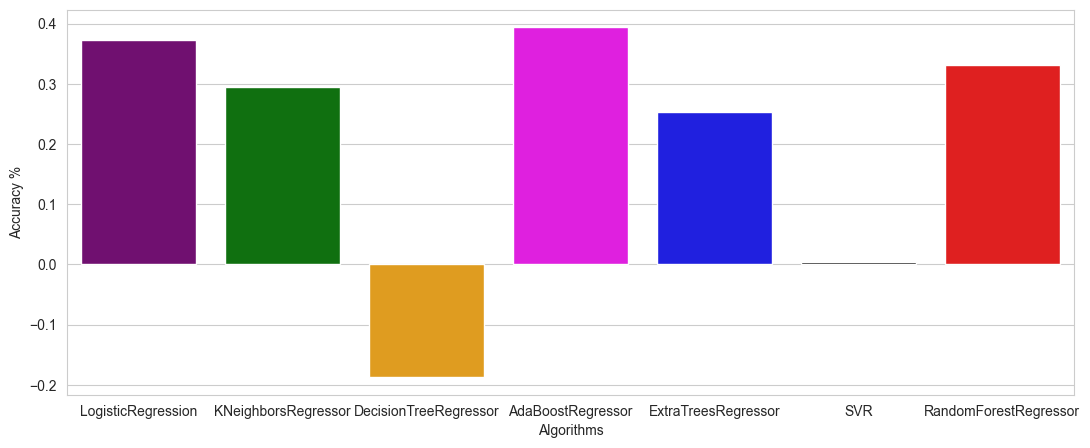

In [54]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(13,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [55]:
df.head()

,price,cost,sales,revenue
0,218.54,181.61,40,3949.17
1,477.82,385.03,7,-3521.00
2,379.40,276.74,32,14285.56
3,319.40,281.84,48,12261.07
4,120.21,69.74,19,-4588.26


In [56]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [57]:
df.columns

Index(['price', 'cost', 'sales', 'revenue'], dtype='object')

<Axes: >

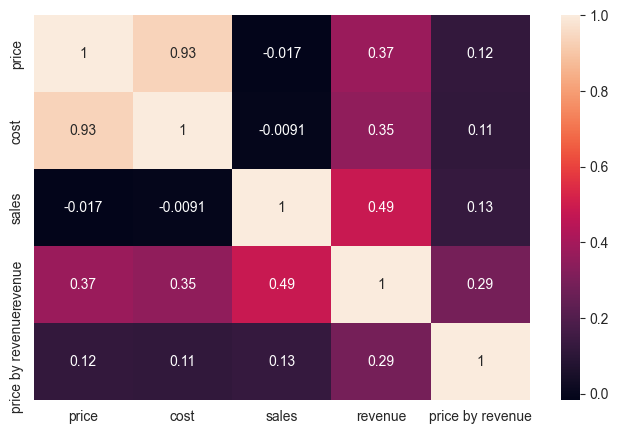

In [70]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

In [72]:
df.head()

,price,cost,sales,revenue,price by revenue
0,218.54,181.61,40,3949.17,0
1,477.82,385.03,7,-3521.00,2
2,379.40,276.74,32,14285.56,3
3,319.40,281.84,48,12261.07,3
4,120.21,69.74,19,-4588.26,2


In [73]:
df=df.drop('price by revenue',axis=True)

In [74]:
df.columns

Index(['price', 'cost', 'sales', 'revenue'], dtype='object')

<Axes: >

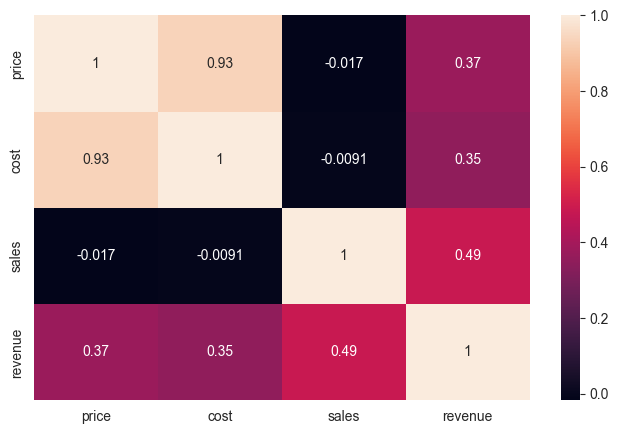

In [75]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

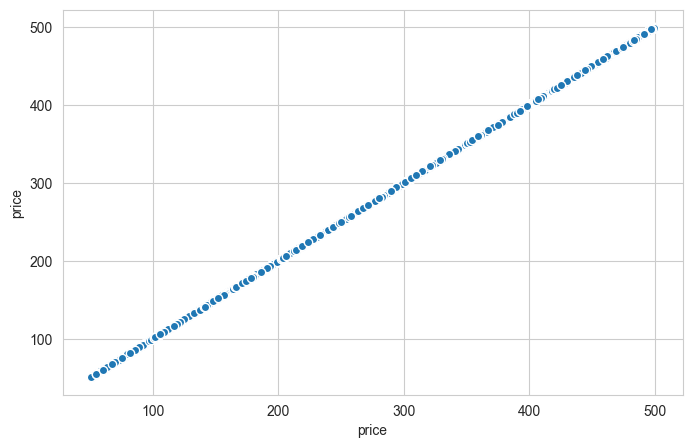

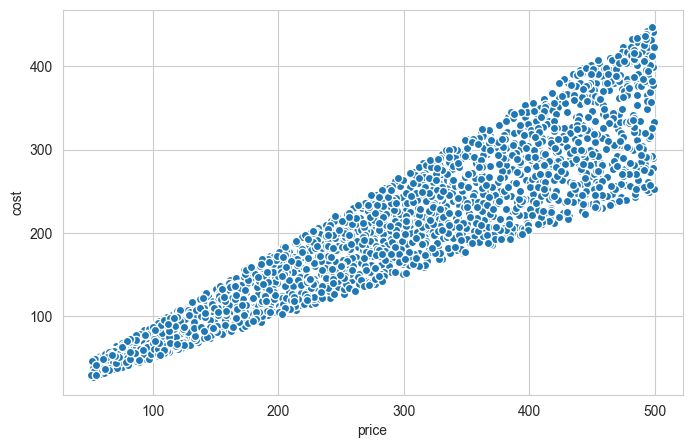

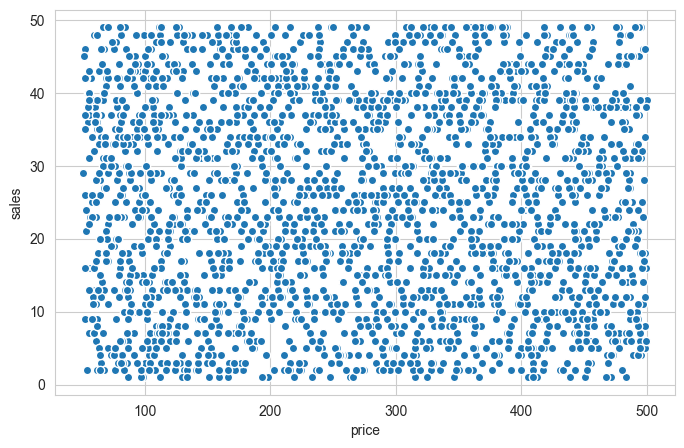

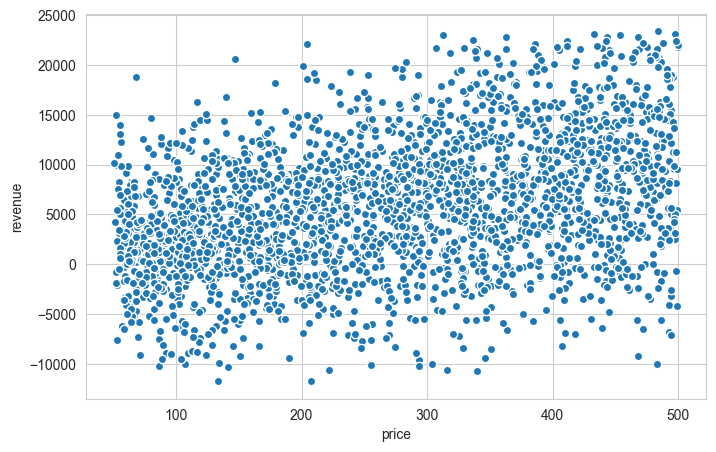

In [77]:
for i in ['price', 'cost', 'sales', 'revenue']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df.price,y=df[i],data=df,linewidth=1,)
    plt.show()

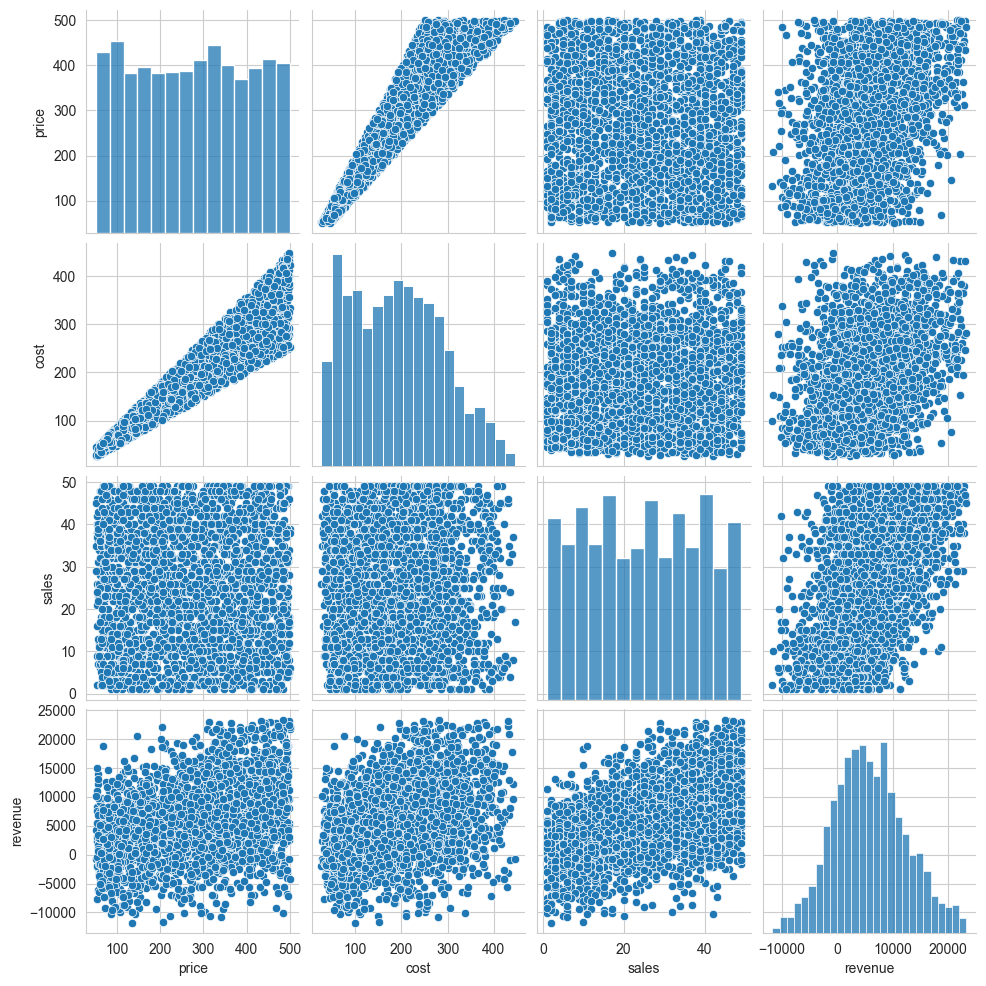

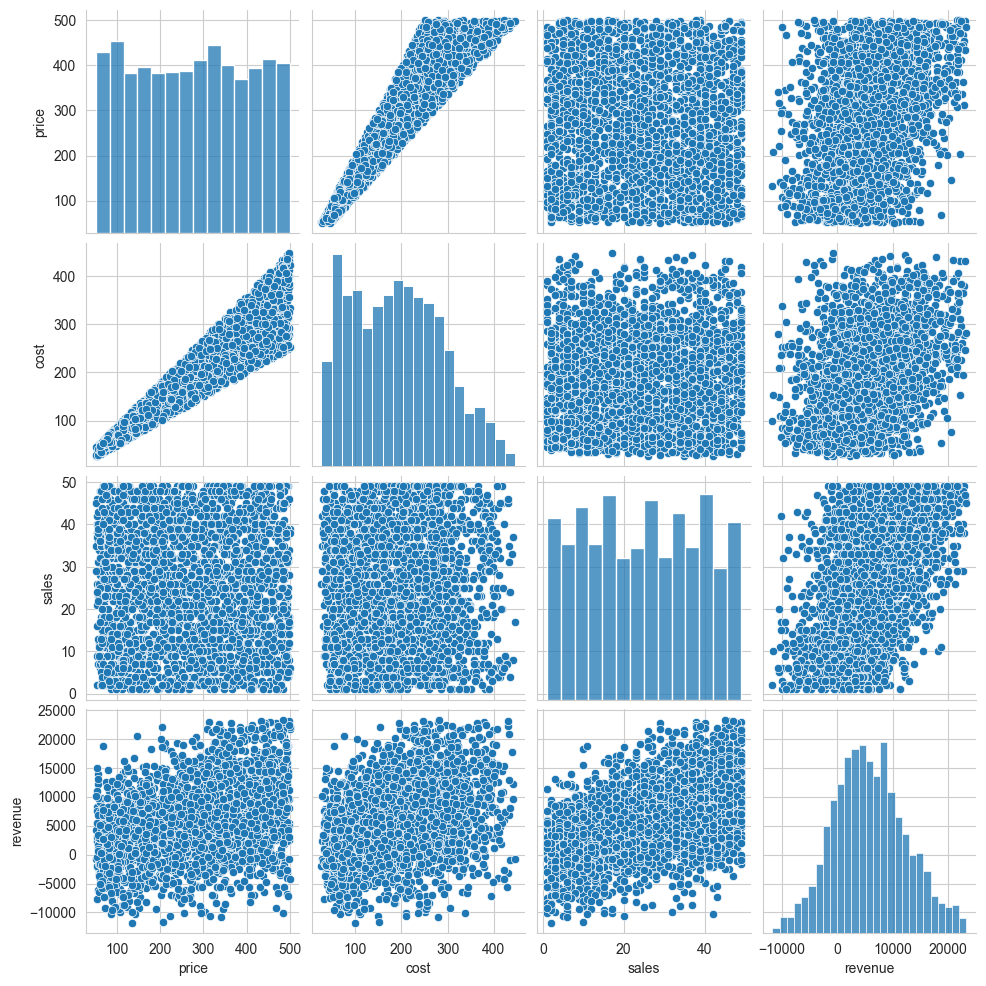

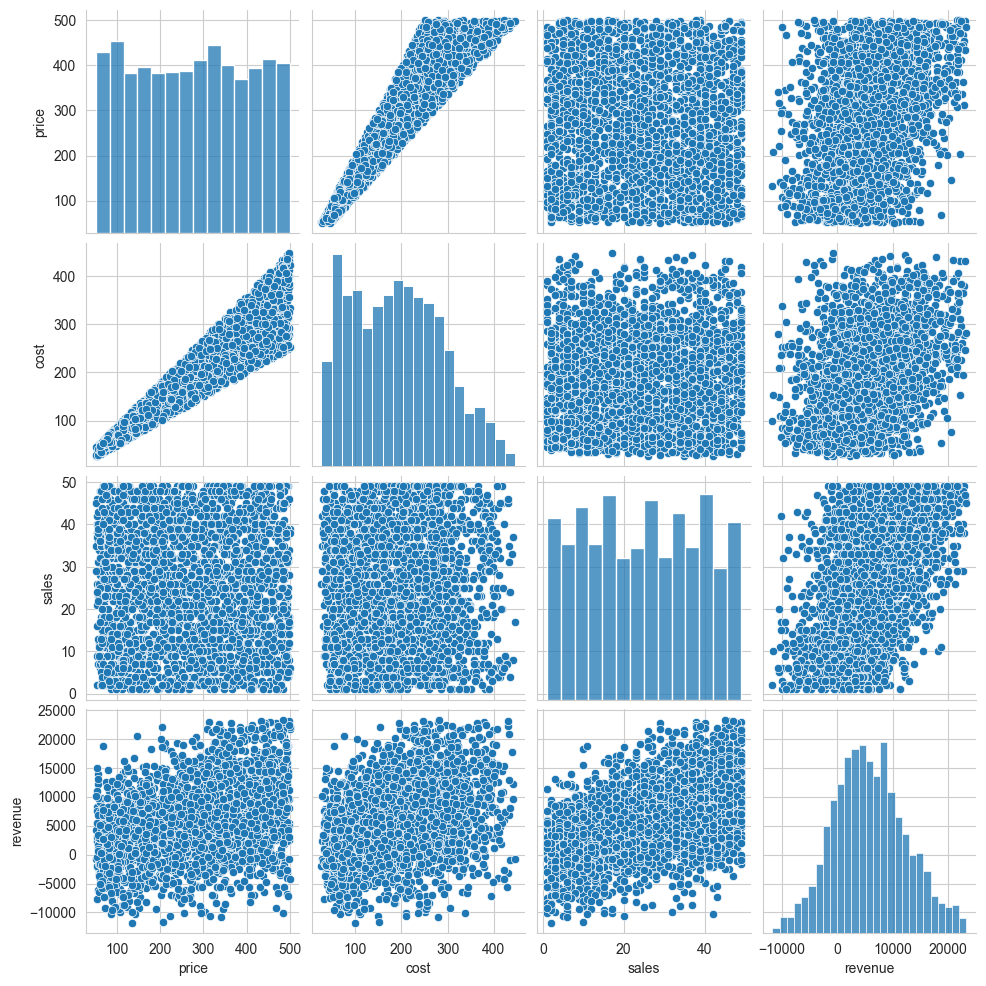

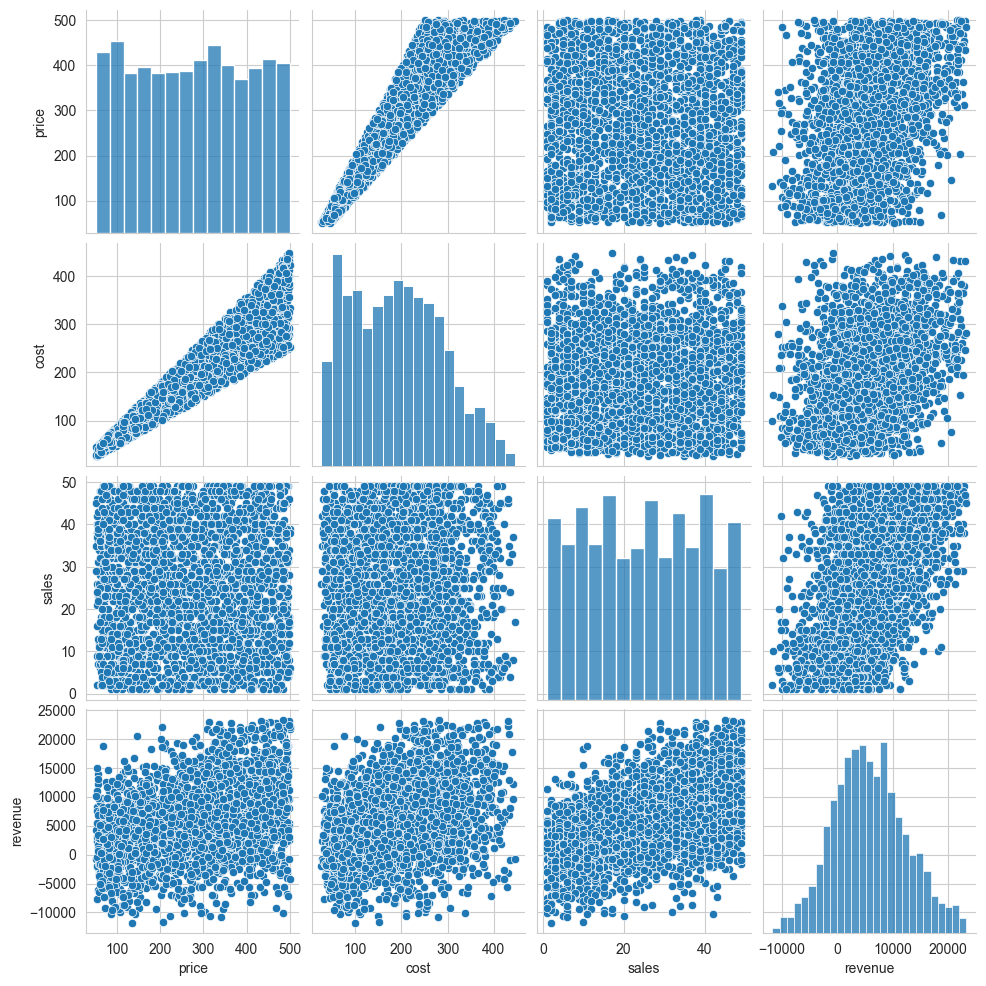

In [86]:
for i in ['price', 'cost', 'sales', 'revenue']:
    
    sns.pairplot(data=df)
    plt.show()

In [88]:
df['price'].value_counts()

price
486.46    3
88.41     2
464.38    2
133.96    2
350.40    2
         ..
403.33    1
139.85    1
281.41    1
316.59    1
474.82    1
Name: count, Length: 2414, dtype: int64

In [92]:
df.min()

price         50.70
cost          26.51
sales          1.00
revenue   -11745.11
dtype: float64

In [93]:
df.max()

price        499.87
cost         447.02
sales         49.00
revenue    23378.01
dtype: float64

In [94]:
df.columns

Index(['price', 'cost', 'sales', 'revenue'], dtype='object')

In [97]:
lower_boundries= []
upper_boundries= []
for i in [ 'price', 'revenue']:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

price : -181.24499999999998 , 725.675
revenue : -12116.805000000002 , 23452.595


In [99]:
upper_bound

np.float64(73.0)

In [100]:
lower_bound

np.float64(-23.0)

In [98]:
lower_boundries= []
upper_boundries= []
for i in [ 'cost', 'sales']:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

cost : -127.58000000000001 , 495.06
sales : -23.0 , 73.0


In [101]:
upper_bound

np.float64(73.0)

In [103]:
lower_bound

np.float64(-23.0)

In [104]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = [ 'price', 'revenue']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))         

,price,cost,sales,revenue
0,218.54,181.61,40,3949.17
1,477.82,385.03,7,-3521.00
2,379.40,276.74,32,14285.56
3,319.40,281.84,48,12261.07
4,120.21,69.74,19,-4588.26



Inference:
Before removal of outliers, The dataset had 2473 samples.
After removal of outliers, The dataset now has 2473 samples.
